In [5]:
import json
from urllib.request import urlopen
from pylab import *
import dateutil
%matplotlib inline


raw_url = 'http://localhost:5000/counters/{}/data/'
deseasonalized_url = 'http://localhost:5000/counters/{}/data/deseasonalized/'

counters_url = 'http://localhost:5000/counters/'

counters = [x['properties']['id'] for x in json.loads(urlopen(counters_url).read().decode('utf8'))['features']]


In [13]:
def plot_counter(i):
    url = raw_url.format(str(i))
    data = json.loads(urlopen(url).read().decode('utf8'))
    dates = [dateutil.parser.parse(x['datetime']) for x in data['data']]
    
    inbound = [x['inbound'] for x in data['data']]
    plot(dates, inbound)
    
    outbound = [x['outbound'] for x in data['data']]
    plot(dates, outbound)
    
    url = deseasonalized_url.format(str(i))
    data = json.loads(urlopen(url).read().decode('utf8'))
    result = [x['result'] for x in data['data']]
    dates = [dateutil.parser.parse(x['datetime']) for x in data['data']]
    plot(dates,result)
    title(i)

    show()

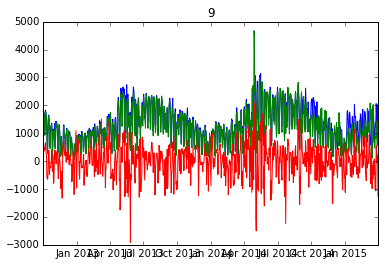

In [14]:
plot_counter(9)

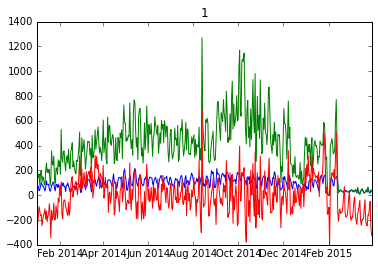

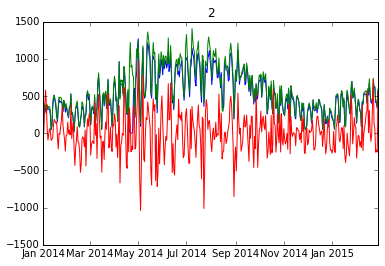

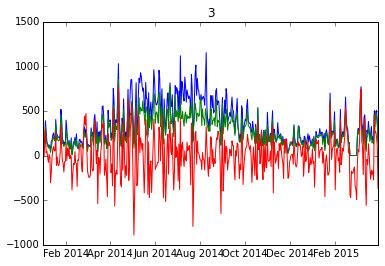

HTTPError: HTTP Error 500: INTERNAL SERVER ERROR

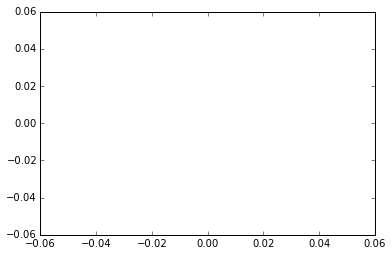

In [15]:
for i in counters:
    plot_counter(i)